In [499]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from random import random
from scipy.stats import sem
from pprint import pprint

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df_mousedrugdata = pd.read_csv(mouse_drug_data_to_load)
df_clinicaltrialdata = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
df_md = df_clinicaltrialdata.merge(df_mousedrugdata, on="Mouse ID",how="outer")

# Display the data table for preview
df_md.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [500]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
df_gb = df_md.groupby(["Drug","Timepoint"])

df_gbMeanTumorVolume = (df_gb["Tumor Volume (mm3)"].mean())

# Convert to DataFrame
df_gbMeanTumorVolume = pd.DataFrame(df_gbMeanTumorVolume).reset_index()

# Preview DataFrame
#df_gbMeanTumorVolume["Timepoint"] = df_gbMeanTumorVolume["Timepoint"].astype(str)

df_gbMeanTumorVolume.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [501]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_errors=df_gb["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
se =pd.DataFrame(standard_errors).reset_index()

se_Cap = se.loc[se["Drug"]=="Capomulin","Tumor Volume (mm3)"]
se_Inf=se.loc[se["Drug"]=="Infubinol","Tumor Volume (mm3)"]
se_Ket=se.loc[se["Drug"]=="Ketapril","Tumor Volume (mm3)"]
se_Pla=se.loc[se["Drug"]=="Placebo","Tumor Volume (mm3)"]

# Preview DataFrame
se.head(20)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [502]:
# Minor Data Munging to Re-Format the Data Frames
df_plot=pd.crosstab(index=df_gbMeanTumorVolume["Timepoint"],columns=df_gbMeanTumorVolume["Drug"], values=df_gbMeanTumorVolume["Tumor Volume (mm3)"],aggfunc=np.mean)

df_plot.reset_index()
# Preview that Reformatting worked
df_plot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


## Sample code for building plot with pandas instead of PyPlot 

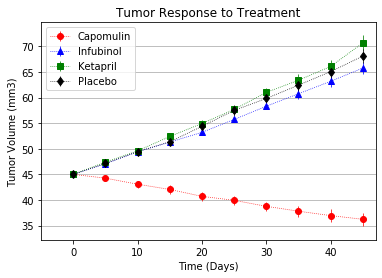

In [504]:
# Generate the Plot (with Error Bars)

plot1=df_plot[["Capomulin","Infubinol","Ketapril","Placebo"]].reset_index()
plotCap = plot1["Capomulin"]
plotTimepoint=plot1["Timepoint"]
plotInf=plot1["Infubinol"]
plotKet=plot1["Ketapril"]
plotPla=plot1["Placebo"]

plt.errorbar(plotTimepoint, plotCap, se_Cap, color="red",fmt=":o",label="Capomulin",linewidth=0.75)
plt.errorbar(plotTimepoint, plotInf, se_Inf, color="blue",fmt=":^",label="Infubinol",linewidth=0.75)
plt.errorbar(plotTimepoint, plotKet, se_Ket, color="green",fmt=":s",label="Ketapril",linewidth=.75)
plt.errorbar(plotTimepoint, plotPla, se_Pla, color="black",fmt=":d",label="Placebo",linewidth=.75)

plt.xlim(min(plotTimepoint) - 5, max(plotTimepoint) + 2)
plt.ylim(min(plotCap)-4, max(plotKet) + 4)

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(axis="y")
plt.legend(loc="best")
# Save the Figure
plt.savefig('Saved Images/Tumor Response to Treatment.png')

plt.show()

## Metastatic Response to Treatment

In [505]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint
df_gbMetastaticResponse=(df_gb["Metastatic Sites"].mean())

# Convert to DataFrame
df_gbMetastaticResponse=pd.DataFrame(df_gbMetastaticResponse).reset_index()

# Preview DataFrame
df_gbMetastaticResponse.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [506]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint
standard_errors_MS=df_gb["Metastatic Sites"].sem()

# Convert to DataFrame
df_se_MS = pd.DataFrame(standard_errors_MS).reset_index()

# Preview DataFrame
df_se_MS.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [507]:
# Minor Data Munging to Re-Format the Data Frames
df_gbMSR_formatted=df_gbMetastaticResponse.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
df_gbMSR_formatted.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


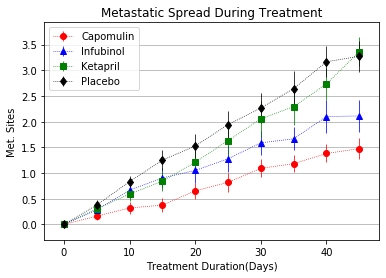

In [508]:
# Generate the Plot (with Error Bars)

plot2=df_gbMSR_formatted[["Capomulin","Infubinol","Ketapril","Placebo"]].reset_index()

plt.errorbar(plot2["Timepoint"],plot2["Capomulin"],df_se_MS.loc[df_se_MS["Drug"]=="Capomulin","Metastatic Sites"],color="red",fmt=":o",label="Capomulin",linewidth=0.75)
plt.errorbar(plot2["Timepoint"],plot2["Infubinol"],df_se_MS.loc[df_se_MS["Drug"]=="Infubinol","Metastatic Sites"],color="blue",fmt=":^",label="Infubinol",linewidth=0.75)
plt.errorbar(plot2["Timepoint"],plot2["Ketapril"],df_se_MS.loc[df_se_MS["Drug"]=="Ketapril","Metastatic Sites"],color="green",fmt=":s",label="Ketapril",linewidth=0.75)
plt.errorbar(plot2["Timepoint"],plot2["Placebo"],df_se_MS.loc[df_se_MS["Drug"]=="Placebo","Metastatic Sites"],color="black",fmt=":d",label="Placebo",linewidth=0.75)

plt.grid(axis="y")
plt.xlim(min(plot2["Timepoint"])-3, max(plot2["Timepoint"]+3))
plt.ylim(min(df_se_MS["Metastatic Sites"])-0.3, max(df_se_MS["Metastatic Sites"])+3.5)
plt.legend(loc="best")
plt.xlabel("Treatment Duration(Days)")
plt.ylabel("Met. Sites")
plt.title("Metastatic Spread During Treatment")

# Save the Figure
plt.savefig("Saved Images/Metastatic Spread During Treatment")

# Show the Figure
plt.show()

## Survival Rates

In [509]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
MouseCount=df_gb["Mouse ID"].count()

# Convert to DataFrame

df_MouseCount=pd.DataFrame(MouseCount).reset_index()
df_MouseCount=df_SR.rename(columns={"Mouse ID":"Mouse Count"})

# Preview DataFrame
df_MouseCount.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [510]:
# Minor Data Munging to Re-Format the Data Frames
df_regrpd=df_MouseCount.pivot(index="Timepoint", columns="Drug",values="Mouse Count")

# Preview the Data Frame
df_regrpd.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


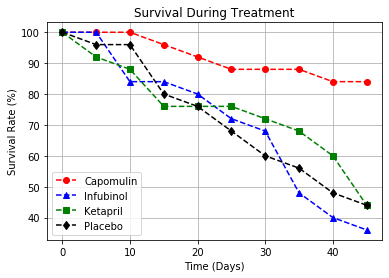

In [511]:
# Generate the Plot (Accounting for percentages)
df_plot3=df_regrpd[["Capomulin","Infubinol","Ketapril","Placebo"]].reset_index()

SR_Capomulin_percent=(df_plot3["Capomulin"]*100/max(df_plot3["Capomulin"]))
SR_Infubinol_percent=(df_plot3["Infubinol"]*100/max(df_plot3["Infubinol"]))
SR_Ketapril_percent=(df_plot3["Ketapril"]*100/max(df_plot3["Ketapril"]))
SR_Placebo_percent=(df_plot3["Placebo"]*100/max(df_plot3["Placebo"]))

plt.plot(df_plot3["Timepoint"],SR_Capomulin_percent, marker="o",linestyle='dashed', color="red",label="Capomulin")
plt.plot(df_plot3["Timepoint"],SR_Infubinol_percent, marker="^",linestyle="dashed", color="blue",label="Infubinol")
plt.plot(df_plot3["Timepoint"],SR_Ketapril_percent,marker="s",linestyle="dashed",color="green",label="Ketapril")
plt.plot(df_plot3["Timepoint"],SR_Placebo_percent,marker="d",linestyle="dashed",color="black",label="Placebo")

plt.grid()
plt.legend()
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.title("Survival During Treatment")

# Save the Figure
plt.savefig("Saved Images/Survival During Treatment")
# Show the Figure
plt.show()

## Summary Bar Graph

In [512]:
# Calculate the percent changes for each drug

drugs=df_gbMeanTumorVolume["Drug"].unique()
percentChange=[]
for drug in drugs:
    pc=(df_plot.at[45,drug]-df_plot.at[0,drug])*100/df_plot.at[0,drug]
    percentChange.append(pc)

df_PercentChange = pd.DataFrame({"Drug":drugs,"Percent Change":percentChange})

# Display the data to confirm
df_PercentChange

,Drug,Percent Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


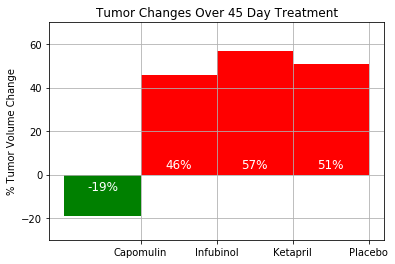

In [513]:
# Store all Relevant Percent Changes into a Tuple
PC = (df_PercentChange["Percent Change"])
drug=(df_PercentChange["Drug"])

# Splice the data between passing and failing drugs
drug_relevant_tuple=(drug[0],drug[2],drug[3],drug[5])
PC_relevant_tupple = (PC[0],PC[2],PC[3],PC[5])

# Formatting the Percent tuple to removed decimal places
PC_relevant_tupple = tuple([float("{0:.0f}".format(n)) for n in PC_relevant_tupple])

fig, ax=plt.subplots()

index=np.arange(len(PC_relevant_tupple))
tick_locations=[value for value in index]
rectsPass=ax.bar(index[0],PC_relevant_tupple[0],1,color="green")
rectsFail=ax.bar(index[1:],PC_relevant_tupple[1:],1, color="red")

# Orient widths. Add labels, tick marks, etc. 
ax.set_title("Tumor Changes Over 45 Day Treatment")
ax.set_ylabel("% Tumor Volume Change")
ax.set_xticks(index+.5)
ax.set_xticklabels(drug_relevant_tuple)
ax.grid(True)
ax.set_autoscaley_on(False)
ax.set_ylim(min(PC_relevant_tupple)-11,max(PC_relevant_tupple)+13)

# Use functions to label the percentages of changes

def displayFail(rects):
    for rect in rects:
        ax.text(rect.get_x()+ rect.get_width()/2, 3,'%d%%'%int(rect.get_height()),
                ha='center',color="white",fontsize=12)

def displayPass(rects):
    for rect in rects:
        ax.text(rect.get_x()+ rect.get_width()/2, -7,'%d%%'%int(rect.get_height()),
                ha='center',color="white",fontsize=12)


# Call functions to implement the function calls
displayPass(rectsPass)
displayFail(rectsFail)

# Save the Figure
plt.savefig("Saved Images/Tumor Changes Over 45 Day Treatment")

# Show the Figure
plt.show()